In [2]:
from intent_recognition import *

In [3]:
# EXERCICI 4 BÀSIC
tf.keras.utils.set_random_seed(42)
hyperparams = {'vocab_size': 500, 'embedding_dim': 1024, 'epochs': 5, 'batch_size': 32}

train_config = {'use_class_weights': True}


model = Sequential()
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation="relu"))
basic = IntentRecognition(model, hyperparams, train_config=train_config, training_times=1, verbosing=1, name="testing", save_results=False)
basic.train_model()
basic.print_training_information()
basic.evaluate_model()
#basic.view_wrong_predictions()

Number of classes in training data: 22
Training model 1/1Epoch 1/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5049 - f1_score: 0.0516 - loss: 3.1292 - val_accuracy: 0.1244 - val_f1_score: 0.1421 - val_loss: 2.9379
Epoch 2/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2599 - f1_score: 0.1916 - loss: 2.9142 - val_accuracy: 0.1811 - val_f1_score: 0.2313 - val_loss: 2.6495
Epoch 3/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4144 - f1_score: 0.3297 - loss: 2.5143 - val_accuracy: 0.6744 - val_f1_score: 0.3640 - val_loss: 1.9901
Epoch 4/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8003 - f1_score: 0.4546 - loss: 1.9118 - val_accuracy: 0.7211 - val_f1_score: 0.4708 - val_loss: 1.3678
Epoch 5/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8348 - f1_score: 0.4794 - loss: 1.3093 - val_accuracy: 0.8933 - val_f1_score: 0.5414 - val_loss: 0.6746


Average Training Accuracy: 0.8764100074768066
Average Training F1: 0.5135329365730286
Average Tr

In [4]:
print(basic.class_weights_dict)

{0: 1.5446969696969697, 1: 2.7259358288770055, 2: 185.36363636363637, 3: 0.5566475566475566, 4: 185.36363636363637, 5: 1.482909090909091, 6: 92.68181818181819, 7: 13.24025974025974, 8: 14.258741258741258, 9: 185.36363636363637, 10: 11.585227272727273, 11: 12.357575757575757, 12: 0.06131777583977385, 13: 12.357575757575757, 14: 16.85123966942149, 15: 4.029644268774703, 16: 12.357575757575757, 17: 0.9131213613972234, 18: 185.36363636363637, 19: 61.78787878787879, 20: 3.707272727272727, 21: 92.68181818181819}


In [ ]:
Average Training Accuracy: 0.9970573782920837
Average Training F1: 0.9021275043487549
Average Training Loss: 0.012978216633200645
Average Validation Accuracy: 0.9688888788223267
Average Validation F1: 0.6097612977027893
Average Validation Loss: 0.13441801071166992
Best Model Validation Accuracy: 0.9688888788223267
Best Model Validation F1: 0.6097612977027893

Evaluating model...
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9593 - f1_score: 0.4792 - loss: 0.1576
Test accuracy: 0.9594594836235046
Test Macro F1: 0.590165376663208

In [1]:
model = Sequential()
model.add(Embedding(500, 256))  # Embedding layer
model.add(Bidirectional(LSTM(16, return_sequences=True)))
model.add(GlobalMaxPooling1D())
model.add(Dense(22, activation="softmax"))  # Output layer

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model and capture the training history
history = model.fit(
    basic.train_pad_sequences, 
    basic.train_encoded_labels, 
    batch_size=basic.hyperparams['batch_size'], 
    epochs=basic.hyperparams['epochs'], 
    validation_data=(basic.val_pad_sequences, basic.val_encoded_labels),
    verbose=basic.verbosing
)

NameError: name 'Sequential' is not defined

In [6]:
best_model = tf.keras.models.clone_model(model)
best_model.set_weights(model.get_weights())

ValueError: You called `set_weights(weights)` on layer 'sequential_3' with a weight list of length 15, but the layer was expecting 21 weights.

In [34]:
from plot_functions import *
import pandas as pd
df = pd.read_csv('./results/complete_results_rec2.csv')

plot_name_metrics(df, "k", metric="val_f1")

No data found for architecture: k


c:\Users\Usuario\Documents\Universitat\5_Quatri\TVD\frame-based\frame-based-system\plot_functions.py:85: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout() # Es veu millor


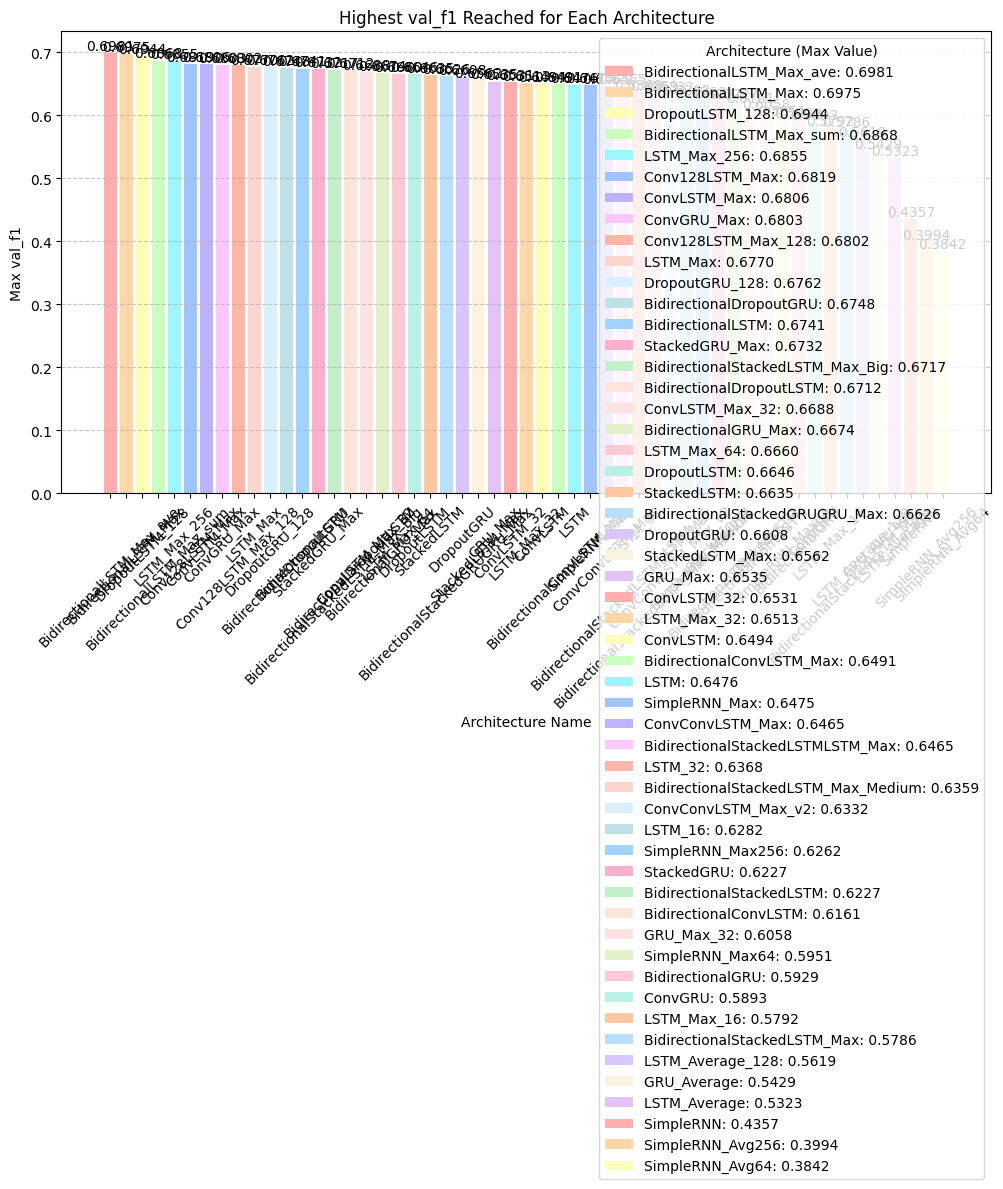

In [35]:
plot_highest_bar(df, metric="val_f1")

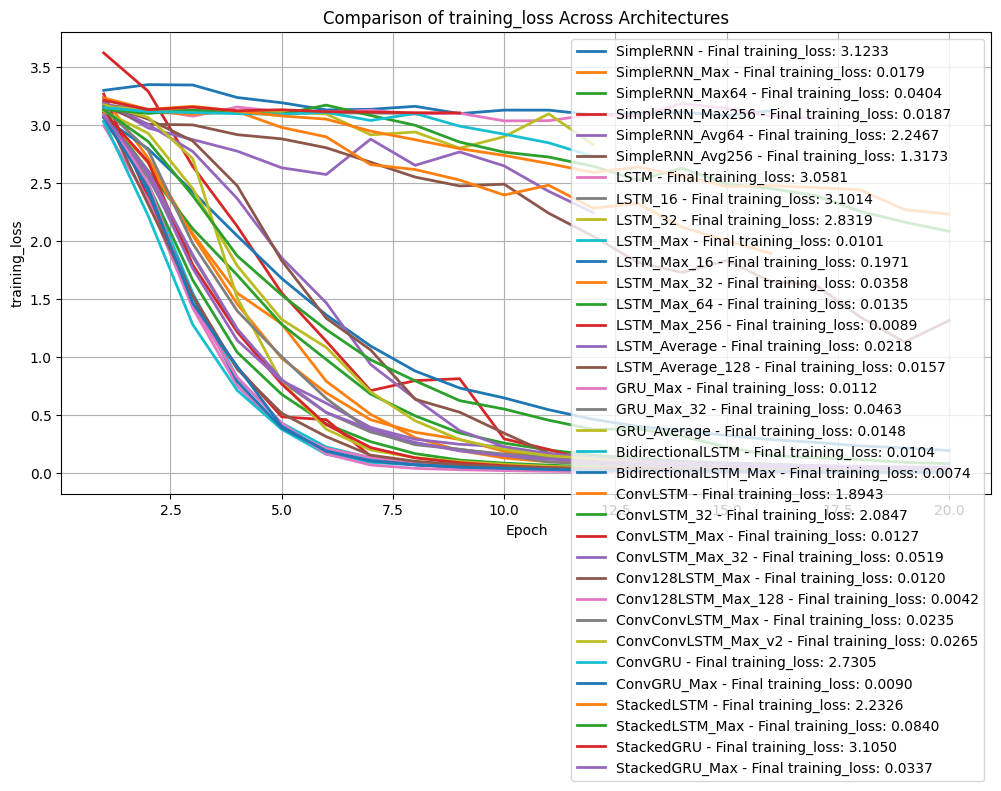

In [50]:
plot_compare_architectures(df, metric="training_loss")

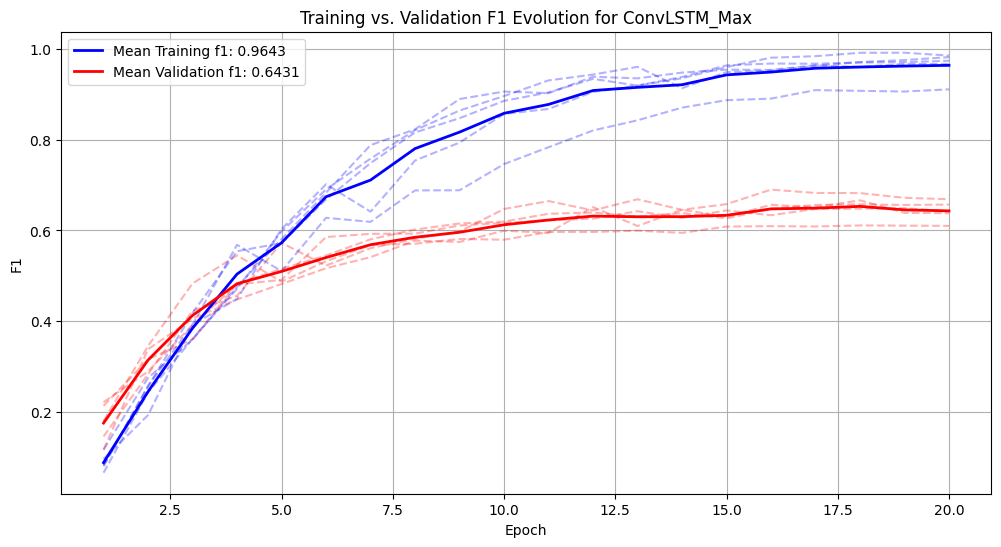

In [11]:
plot_train_val_comparison(df, 'ConvLSTM_Max', metric='f1', comparison_type='all')